In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/mldata.csv")

In [33]:
data.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?_code,Extra-courses did_code,certifications_code,workshops_code,reading and writing skills_code,memory capability score_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Taken inputs from seniors or elders_code,Interested Type of Books_code,Management or Technical_code,hard/smart worker_code,worked in teams ever?_code,Introvert_code,Suggested Job Role_code
0,5,0,6,2,1,0,4,6,2,2,9,5,0,0,28,0,1,1,0,0
1,7,6,4,3,0,1,8,6,0,1,2,4,1,1,3,1,0,0,1,0
2,2,3,9,1,0,1,4,6,0,2,5,0,9,1,29,1,1,0,0,0
3,2,6,3,5,0,1,7,2,0,2,7,5,7,1,13,0,1,1,1,0
4,2,0,3,4,1,0,1,3,0,1,3,4,0,0,14,1,0,1,0,0


In [38]:
data.columns.tolist()

['Logical quotient rating',
 'hackathons',
 'coding skills rating',
 'public speaking points',
 'self-learning capability?_code',
 'Extra-courses did_code',
 'certifications_code',
 'workshops_code',
 'reading and writing skills_code',
 'memory capability score_code',
 'Interested subjects_code',
 'interested career area _code',
 'Type of company want to settle in?_code',
 'Taken inputs from seniors or elders_code',
 'Interested Type of Books_code',
 'Management or Technical_code',
 'hard/smart worker_code',
 'worked in teams ever?_code',
 'Introvert_code',
 'Suggested Job Role_code']

In [4]:
target = "Suggested Job Role"+"_code"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   object
 5   Extra-courses did                    6901 non-null   object
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading and writing skills           6901 non-null   object
 9   memory capability score              6901 non-null   object
 10  Interested subjects                  6901 non-null   object
 11  interested career area               6901 n

In [5]:
data.dropna(inplace=True)

In [6]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

categorical_cols= data.select_dtypes(include=['object']).columns.tolist()

print("\nList of Categorical features: \n" , categorical_cols )


List of Categorical features: 
 ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


In [7]:
Dict={}
for i in data[categorical_cols]:
    data[i] = data[i].astype('category')
    data[i + "_code"] = data[i].cat.codes
    
    Dict[i+"_code"]={}
    for j in range(0,len(data.axes[0])):
        Dict[i+"_code"][data[i].iloc[j]] = data[i+"_code"].iloc[j]
    data= data.drop(i, axis=1)
        
print(Dict) 

{'self-learning capability?_code': {'yes': 1, 'no': 0}, 'Extra-courses did_code': {'no': 0, 'yes': 1}, 'certifications_code': {'information security': 4, 'shell programming': 8, 'r programming': 7, 'distro making': 1, 'machine learning': 5, 'full stack': 2, 'hadoop': 3, 'app development': 0, 'python': 6}, 'workshops_code': {'testing': 6, 'database security': 2, 'game development': 3, 'data science': 1, 'system designing': 5, 'hacking': 4, 'cloud computing': 0, 'web technologies': 7}, 'reading and writing skills_code': {'poor': 2, 'excellent': 0, 'medium': 1}, 'memory capability score_code': {'poor': 2, 'medium': 1, 'excellent': 0}, 'Interested subjects_code': {'programming': 9, 'Management': 2, 'data engineering': 5, 'networks': 7, 'Software Engineering': 3, 'cloud computing': 4, 'parallel computing': 8, 'IOT': 1, 'Computer Architecture': 0, 'hacking': 6}, 'interested career area _code': {'testing': 5, 'system developer': 4, 'Business process analyst': 0, 'security': 3, 'developer': 2,

In [8]:
from sklearn.model_selection import train_test_split

X=data.drop([target], axis=1)
y=data[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
train_data = X_train.join(y_train)

In [34]:
train_data.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?_code,Extra-courses did_code,certifications_code,workshops_code,reading and writing skills_code,memory capability score_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Taken inputs from seniors or elders_code,Interested Type of Books_code,Management or Technical_code,hard/smart worker_code,worked in teams ever?_code,Introvert_code,Suggested Job Role_code
165,6,3,2,7,1,1,3,4,1,0,8,2,4,1,11,1,0,1,0,0
3874,2,2,9,7,0,0,0,3,0,2,9,0,9,0,19,0,1,0,1,6
5714,4,3,2,7,1,0,2,6,1,0,1,0,4,0,26,1,1,1,0,9
5420,9,6,8,5,1,0,8,5,0,2,9,5,3,1,12,0,1,1,1,9
3894,3,1,6,7,1,0,2,0,1,2,1,1,6,0,5,1,0,0,1,6


<AxesSubplot: >

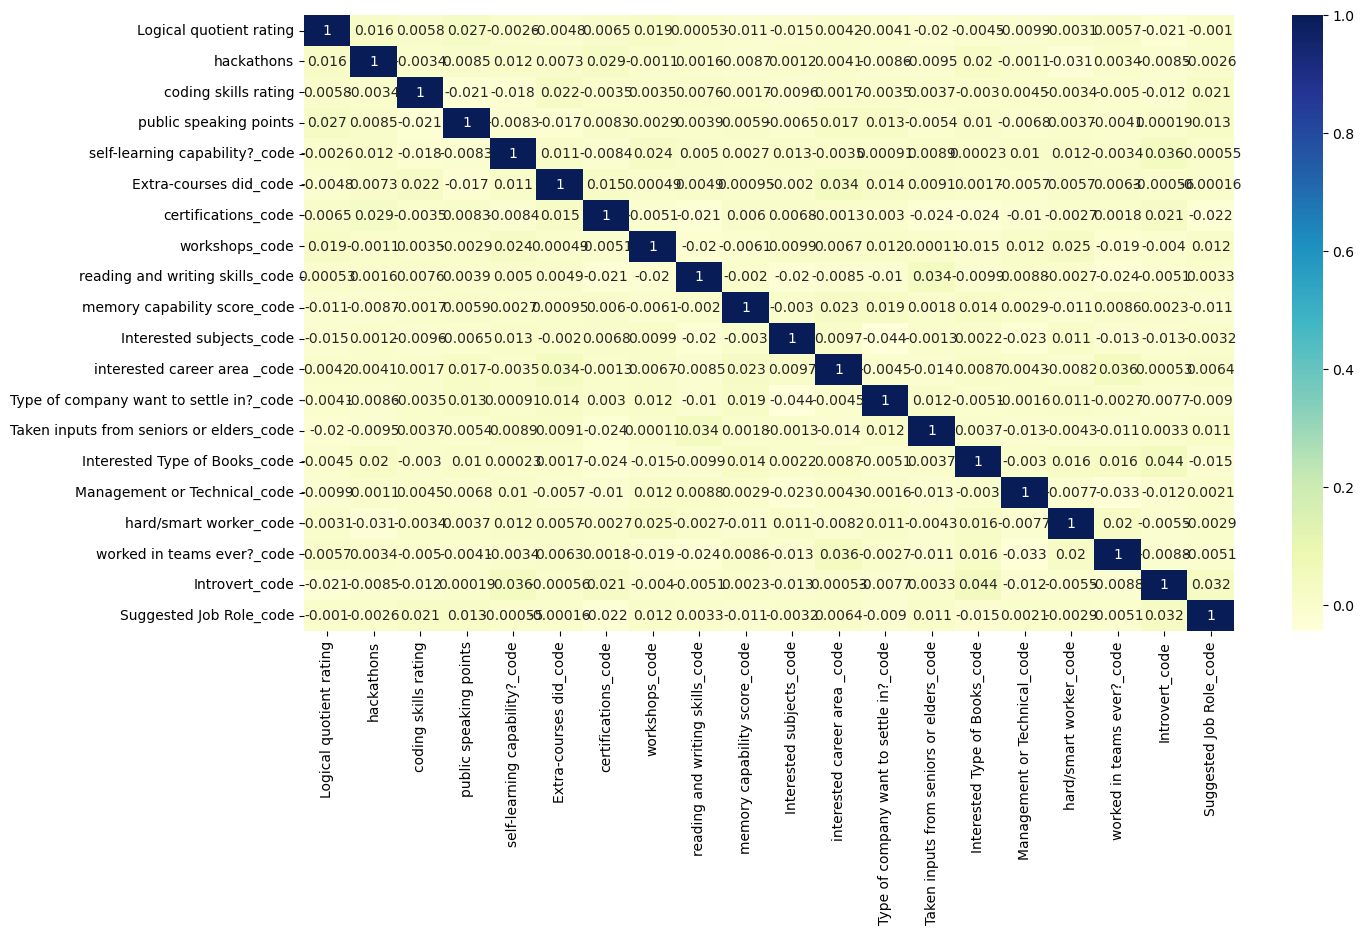

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot: xlabel='Logical quotient rating', ylabel='coding skills rating'>

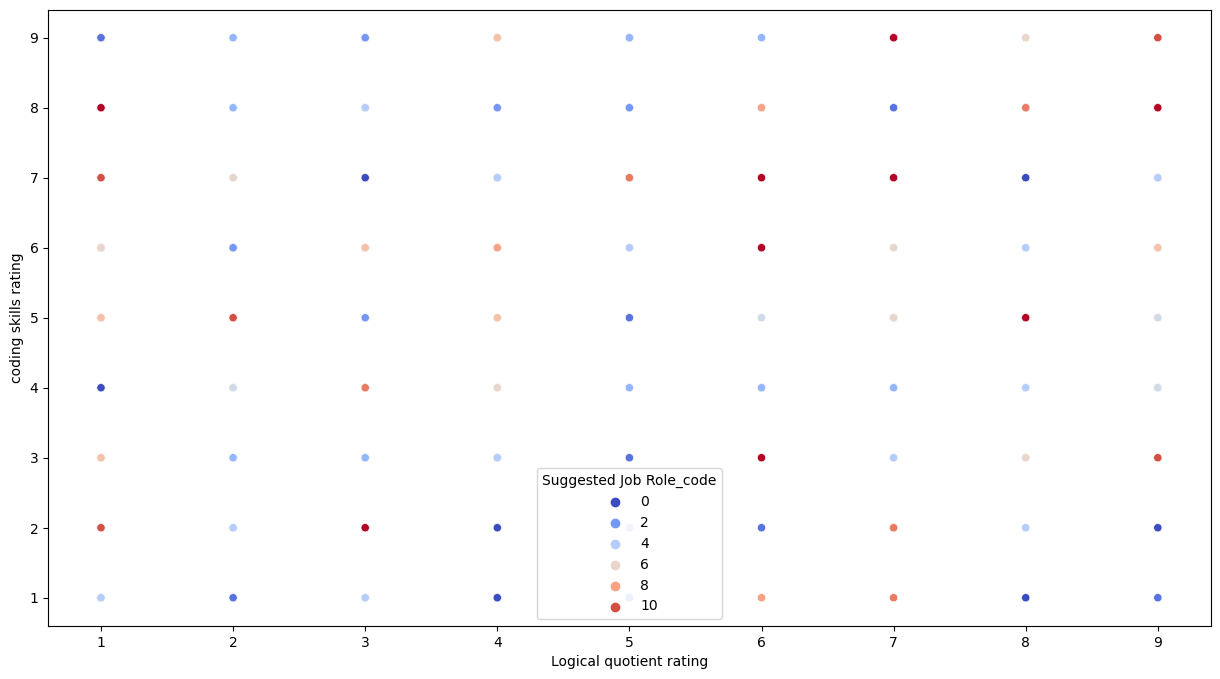

In [13]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Logical quotient rating", y="coding skills rating", data=train_data, hue=target, palette="coolwarm")

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

scaler = StandardScaler()

X_train, y_train = train_data.drop([target], axis=1), train_data[target]
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)


LinearRegression()

In [35]:
test_data = X_test.join(y_test)
X_test, y_test = test_data.drop([target], axis=1), test_data[target]

test_data.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?_code,Extra-courses did_code,certifications_code,workshops_code,reading and writing skills_code,memory capability score_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Taken inputs from seniors or elders_code,Interested Type of Books_code,Management or Technical_code,hard/smart worker_code,worked in teams ever?_code,Introvert_code,Suggested Job Role_code
3866,2,1,8,6,1,1,4,7,1,1,8,1,7,1,16,1,1,1,1,6
1252,6,1,2,6,0,0,7,3,0,0,5,5,9,0,9,0,1,0,0,2
937,2,4,5,2,1,1,5,2,1,2,8,5,7,1,4,0,0,1,0,1
5775,1,6,3,9,1,1,6,7,1,1,2,0,5,1,12,1,1,1,1,10
227,9,4,8,8,0,1,8,2,1,0,0,0,3,0,13,0,0,1,1,0


In [16]:
X_test_s = scaler.transform(X_test)

reg.score(X_test_s, y_test)

-0.004726695263123748

In [17]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [18]:
forest.score(X_test_s, y_test)

-0.02399907613025798

In [20]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor(n_estimators=280, random_state=0)

forest.fit(X_train_s, y_train)

RandomForestRegressor(n_estimators=280, random_state=0)

In [22]:
forest.score(X_test_s, y_test)

-0.027337027233141464

In [50]:
y_predict = forest.predict(X_test_s)

In [29]:
import pickle

filename = "./model.pkl"
pickle.dump(forest, open(filename,"wb"))

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(X_train_s, y_train)

y_pred = dtree.predict(X_test_s)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

confusion matrics= [[ 5  9 10  7  8 15 13 16 13  6 10  8]
 [ 9 10 10  9  8 15 12 10  8  6 10 11]
 [13  6 11 13  9  5 10  6 10  8  9 11]
 [ 6 16  8  5  9  6 14  8  8 10  9  7]
 [13  9  9  7  7 14  7 16 13 15 12  9]
 [10  9 10 13 17 12 12  5 12 13  8 13]
 [13  9  8 10 10  8 11 13  7 12 13 13]
 [ 7  6 14 10  7  7  9 13  7  7 12  6]
 [ 4  6  8 15  7  5  9 10  5  9 14 12]
 [ 7 13 11  6 10  9  6 12  5 14 11  8]
 [11  5 11  8 12  5 10 12  8  8  6  5]
 [ 7 10  9 10 11  5  9 16  4 10 11 10]]
  
accuracy= 0.7892831281679942


In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 42, learning_rate=0.02, n_estimators=300)
xgb.fit(X_train_s, y_train)
xgb_y_pred = xgb.predict(X_test_s)
xgb_cm = confusion_matrix(y_test,xgb_y_pred)
xgb_accuracy = accuracy_score(y_test,xgb_y_pred)
print("confusion matrics=",xgb_cm)
print("  ")
print("accuracy=",xgb_accuracy*10)

confusion matrics= [[ 4  7 14  9 13 13  3  9 16  9 15  8]
 [ 6  5 13  8 10 13 10 15  8  9 12  9]
 [ 8  9  8  6 10 13 10 11  9 10 10  7]
 [ 6  7 12  9 14  5  9 12  8  6 11  7]
 [ 8 10 18 11 14 13  7  8 14 12  9  7]
 [ 9 12 16 10  9 10  7  7 14  6 18 16]
 [ 7  9 15  8 11  9  5 15 12 15 13  8]
 [ 7  8 11  3 12 10 10 12  9  8 11  4]
 [ 5 11 17  5 16  7  8  2  8 11  9  5]
 [ 7  8 10  3  8 11 10 13  9 10  9 14]
 [ 5  4 11  8 16 10  7 11 13  4  6  6]
 [ 9  5 16  5 13  8  7 11 10  9 10  9]]
  
accuracy= 0.7241129616220131


In [52]:
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train_s, y_train)
svm_y_pred = svm.predict(X_test_s)
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)
print("confusion matrics=",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*10)

confusion matrics= [[11  9 16  2 13  9  9  7 20  9 11  4]
 [ 5  8 13  4 19 14  5 18  6  6 16  4]
 [ 7  3  9 11 17 10  7 10  7 16 10  4]
 [ 5  3 12  4 12  8  7 14 14 10 11  6]
 [13  9 19  8 13 11 10  9  8 10 10 11]
 [11  9 18  8 19  9  9 16 11 10  9  5]
 [ 8 10 17  9 15  6  8 12 11 11 14  6]
 [ 4  6 13 11 15  5 14 12  5  7 11  2]
 [11 10  9  3 16  8  6 10  9 10  8  4]
 [ 6 11  7  5  9 12  8 13 10 15  8  8]
 [ 5  3 12  9 14  5 10 11  5 11  9  7]
 [ 5  7 15  5 15  9  7 12  7 13 12  5]]
  
accuracy= 0.8110065170166546
